In [40]:
import sys, os, csv, glob, json, uuid, pickle, math
import nltk 
import gensim, logging
import numpy as np, scipy, pandas as pd
from sklearn.manifold import TSNE
from operator import itemgetter
from IPython.display import HTML, display
import tabulate
from bs4 import BeautifulSoup
import urllib
import matplotlib.pyplot as plt
from random import randint

In [ ]:
CONTENT_PATH = './tamil/'
if not os.path.exists(CONTENT_PATH):
    os.makedirs(CONTENT_PATH)
    
ps_urls = [
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_01_01.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_01_02.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_01_03.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_01_04.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_01_05.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_01_06.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_02_01.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_02_02.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_02_03.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_02_04.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_02_05.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_02_06.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_03_01.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_03_02.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_03_03.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_03_04.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_03_05.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_04_01.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_04_02.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_04_03.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_04_04.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_04_05.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_05_01.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_05_02.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_05_03.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_05_04.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_05_05.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_05_06.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_05_07.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_05_08.html',
    'http://www.projectmadurai.org/pm_etexts/utf8/pmuni0169_05_09.html'
]

def process_url(url):
    with urllib.request.urlopen(url) as url:
        url_html = url.read()
        soup = BeautifulSoup(url_html)
        url_txt = soup.get_text()
        tname = CONTENT_PATH + str(uuid.uuid4()) + '-sent.txt'
        tf = open(tname, 'w')
        for sentence in nltk.sent_tokenize(url_txt):
            tf.write("%s\n" % sentence.lower().strip())
        tf.close()

[process_url(x) for x in ps_urls]

In [ ]:
class MySentences(object):
    def __init__(self, dirname):
        self.dirname = dirname
 
    def __iter__(self):
        for fname in glob.iglob(self.dirname + '*.txt', recursive=True):
            for line in open(fname):
                yield nltk.word_tokenize(line)

In [ ]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
sentences = MySentences('./tamil/') 
model = gensim.models.Word2Vec(sentences, min_count=10)

In [ ]:
model.save('./model/w2v-tamil-10.model')
model.wv.save_word2vec_format('./model/w2v-tamil-10.model.bin', binary=True)
vocab = dict([(k, v.index) for k, v in model.wv.vocab.items()])
with open('./model/w2v-tamil-10-vocab.json', 'w') as f:
    f.write(json.dumps(vocab))

In [4]:
model = gensim.models.Word2Vec.load('./model/w2v-tamil-10.model')

In [39]:
model.wv.most_similar('வந்தியத்தேவன்', topn=20)

[('ஆழ்வார்க்கடியான்', 0.966097354888916),
 ('கரிகாலன்', 0.9377098083496094),
 ('ரவிதாஸன்', 0.9222618341445923),
 ('வல்லவரையன்', 0.9123055934906006),
 ('ஒருவன்', 0.9004799127578735),
 ('பார்த்திபேந்திரன்', 0.8957126140594482),
 ('நின்று', 0.8838356733322144),
 ('கந்தமாறன்', 0.8809530735015869),
 ('அமுதன்', 0.8767805099487305),
 ('உற்றுப்', 0.8747536540031433),
 ('கேட்டுக்', 0.8744937181472778),
 ('பார்த்துக்', 0.8730440139770508),
 ('தேவராளன்', 0.8703194856643677),
 ('விரைந்து', 0.8651672601699829),
 ('உட்கார்ந்து', 0.8651606440544128),
 ('கொண்டே', 0.8633405566215515),
 ('கீழே', 0.8608478307723999),
 ('குதிரை', 0.8593142032623291),
 ('இன்னொருவன்', 0.8520840406417847),
 ('உள்ளே', 0.850855827331543)]

In [50]:
N = 100
TOP_X = 30
start = 'வந்தியத்தேவன்'
result = start
curr = start
for i in range(N):
    curr = model.wv.most_similar(curr, topn=TOP_X)[randint(0, TOP_X-1)][0]
    result += ' ' + curr
print (result)

வந்தியத்தேவன் குதிரை பேர் பல்லக்கு நந்தினியின் வௌிச்சத்தில் ஜனக் மரங்களின் எட்டுத் தோட்டத்தில் வைத்துச் ஆங்காங்கு காவல் தூர வெளியே வந்தியத்தேவனின் நதிக்கரையில் மறையும் காவலர்கள் சடசடவென்று அமைந்திருந்த சம கோட்டைக்கு அவ்வாறே அங்கிருந்த தோட்டத்தில் வெள்ளத்தில் எட்டுத் கிளை ஜனக் பள்ளிப்படைக் மரத்தடியில் நினைவுகள் பெயர்ந்து நின்றவர்கள் அமைந்திருந்த பூட்டிய காலை அங்கிருந்த கரையை ஜனக் விளக்கின் வருவதைப் நோக்கிக் நோக்கிப் இருள் வெள்ளத்தில் காவல் பாதை சுவரின் பல்லக்கின் அத்தனை கொண்டிருந்தபோது இருவர் கலங்கரை தூர இழந்து பேச்சுக் பாதை நின்றவர்கள் தூதர்கள் உயரம் அறை ஒவ்வொரு காற்றில் தாமும் தாங்கி மறுநாள் தாங்கி பிராயத்தில் ஆயிரமாயிரம் முன்னோர்கள் தீவில் காற்றில் கடைசி இரும்புக் கழுத்தில் பேசத் பிறகும் போதிலும் பிறகும் பூங்குழலியை மேகங்கள் கவர்ந்து நிறைவேற்றிக் கழுத்தில் கோடிக்கரையிலிருந்து நாயனார் இருந்தபடியால் தெரிவித்துக் முழுதும் இருப்பதாக மூலம் போய்ப் வீட்டில் உன்னுடன் உள்ளவர்கள் தங்களுக்கும் மோக நீங்களும் கேள்விக்கு


In [7]:
vectors= []
labels = []
for word in model.wv.vocab:
    vectors.append(model[word])
    labels.append(word)

In [8]:
vectors = np.asarray(vectors)
tsne = TSNE(n_components=2, random_state=0)
vectors = tsne.fit_transform(vectors)

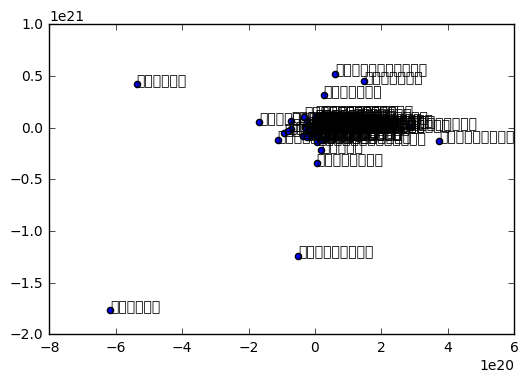

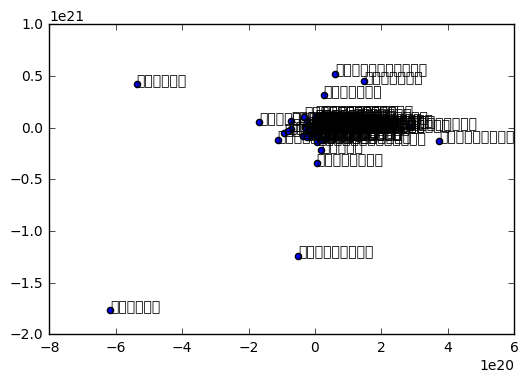

In [28]:
fig, ax = plt.subplots()
x = vectors[:,0]
y = vectors[:,1]
x = x[:100]
y = y[:100]
ax.scatter(x, y)
for i, txt in enumerate(labels[:100]):
   ax.annotate(txt, (x[i], y[i]))
plt.show()